# Personal Injury Prediction In Traffic Accidents - Montgomery County, MD

- Chenchen Feng

## Project Goals

* The goal is by analyzing the past ten years' traffic accident records in Montgomery county Maryland. Find the key drivers of personal injury in those traffic accidents. Make recommendations to the police department to better prediction on personal injury in traffic accidents so the casualty would get treated as early as possible.

## Project Description

* In this report, I will use 2012-01-01 to 2022-08-15 Montgomery County (MD) traffic violation data. Use the classification machine learning method to develop a model to predict personal injury in traffic accidents. It will help the police department has a better preparation of the medical resources for casualties in accidents.


* In the end, I will give out recommendations for the data collection system and the next step I would like to take.

## Initial Questions

1. Does personal injury in an accident related to the hour? or day of the week? month? year?
2. Does the personal injury in accident rate related to race and gender?
3. What about the relationship between personal injury and Violation Type? alcohol?
4. Does personal injury in the accident have a relationship with the agency location?
5. Is property damage and belts use have a relationship with personal injury?

## Data Dictionary

* Date Of Stop: Date of the traffic violation.
* Time Of Stop: Time of the traffic violation.
* SubAgency: Court code representing the district of assignment of the officer. 
* Belts: YES if seat belts were in use in accident cases.
* Personal Injury: Yes if traffic violation involved Personal Injury.
* Property Damage: Yes if traffic violation involved Property Damage.
* Alcohol: Yes if the traffic violation included an alcohol related suspension.
* Violation Type: Violation type. (Examples: Warning, Citation, SERO)
* Contributed To Accident: If the traffic violation was a contributing factor in an accident.
* Race: Race of the driver. (Example: Asian, Black, White, Other, etc.)
* Gender: Gender of the driver (F = Female, M = Male)

In [1]:
# Library will be uesed
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Wrangle Zillow Data 
### (acquire.py + prepare.py)
To acquire the Montgomery county traffic violation data, I did the following two steps:
1. Download the CSV file from https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q.
2. Import CSV file to jupyter notebook.
* Data period: 2012-01-01 to 2022-08-15, if you want to download the data and run the notebook, be aware the date.

In [2]:
import acquire
df = acquire.acquire_data()

To clean the data, I did flowing steps:
1. drop columns
2. check null value
3. convert time format
4. set the time to index and create new columns for year, month, day of the week and hour
5. convert the boolean value into int: Contributed to accident
6. drop rows: SubAgency S15 only has 3 rows and W15 only have 7 rows.
7. get all the data related to the accident.

In [3]:
import prepare
df = prepare.clean_data(df)

Split the data into train 56%, validate 24%, test 20%.
* Our data is now split into 3 samples so that we can use the train sample to explore, fit to models and evaluate without looking at new data.
* The validate is used to verify that our models built are not overfit to the train dataset and get the best model.
* The test set is used to give an estimate of how this model will perform on data is has never seen in the future.

In [4]:
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((26922, 13), (11538, 13), (9616, 13))

## Data Context

There are 48,076 accidents related in Montgomery county, Maryland traffic violation records. 

The data time range is from 2012-01-01 to 2022-08-15. 

Due to COVID, traffic violations and accident numbers reduce a lot from 2020.

<AxesSubplot:xlabel='year', ylabel='Count'>

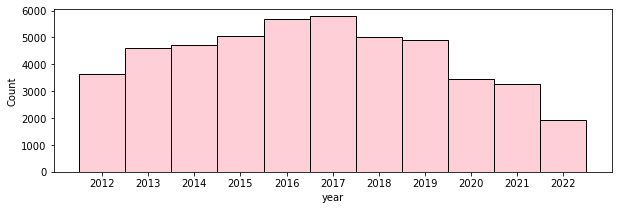

In [5]:
# hist plot for total accidents count from 2012-01-01 to 2022-08-15 in the total traffic violation records
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(df.year.sort_index(ascending=True), color = 'pink')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

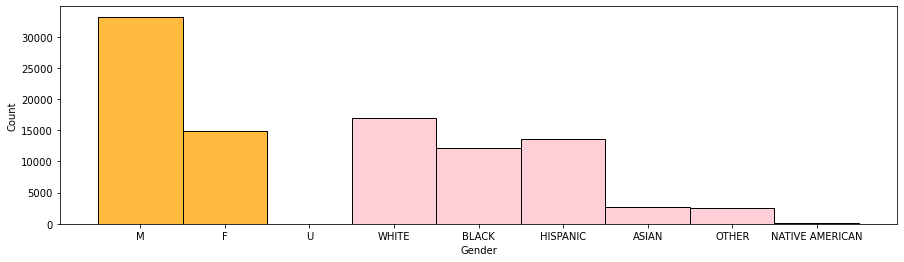

In [6]:
# accidents number by the race and gender
plt.rcParams["figure.figsize"] = (15,4)
sns.histplot(df.Gender.sort_index(ascending=True), color = 'orange')
sns.histplot(df.Race.sort_index(ascending=True), color = 'pink')

* Takeaway: males are more likely to have accidents than females. White people group has the highest accident number.

# Explore

### 1.  Does personal injury in an accident related to the hour? or day of the week? month? year?

<AxesSubplot:xlabel='month', ylabel='Count'>

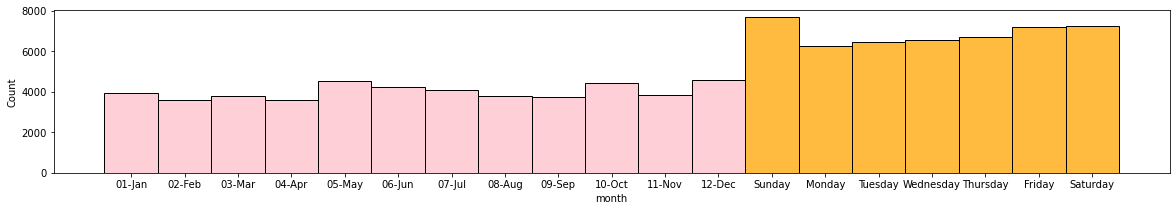

In [7]:
plt.rcParams["figure.figsize"] = (20,3)
sns.histplot(df.month.sort_index(ascending=True), color = 'pink')
sns.histplot(df.day_of_week.sort_index(ascending=True), color = 'orange')

<AxesSubplot:xlabel='hour', ylabel='Count'>

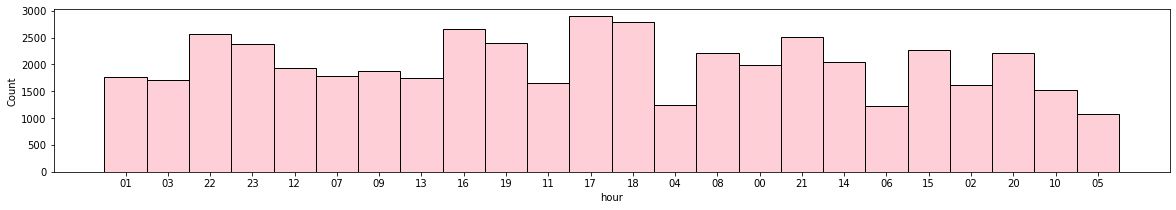

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
sns.histplot(df.hour.sort_index(ascending=True), color = 'pink')

* Holiday season and summertime have more accidents happen.
* Sunday has the highest number of accidents.
* Accidents happen more from 15:00 - 23:00 in Montgomery county.

<AxesSubplot:ylabel='year'>

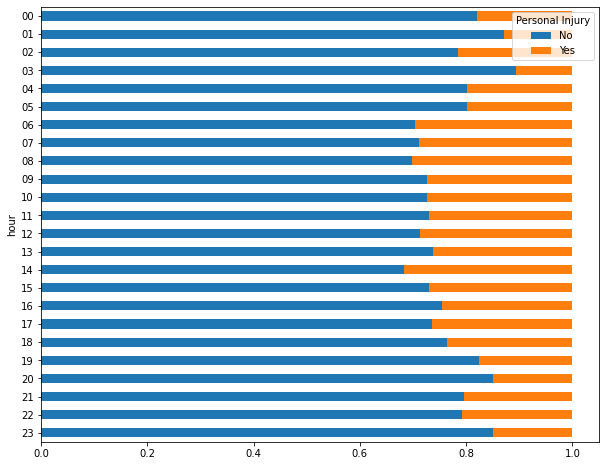

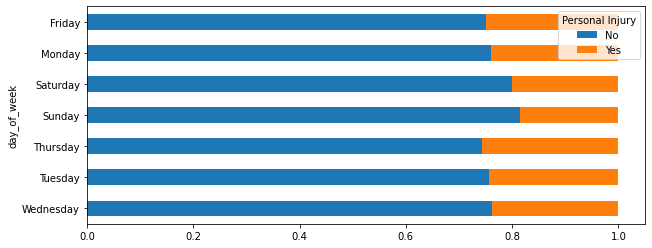

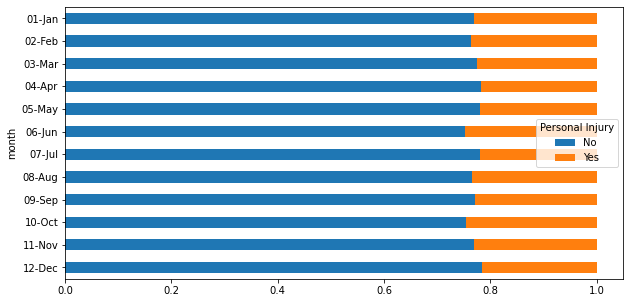

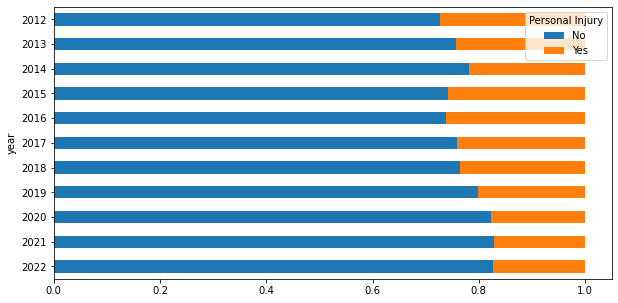

In [14]:
# create hour, day of week, month and year crosstab tables
hour = pd.crosstab(train.hour, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
day_of_week = pd.crosstab(train.day_of_week, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
month = pd.crosstab(train.month, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
year = pd.crosstab(train.year, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)

# plot chart for each table to show the percentage of personal injury
hour.plot.barh(stacked = True, figsize = (10, 8), fontsize = 10)
day_of_week.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
month.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)
year.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)

* Let's run statistic tests for day of week and hours

In [15]:
observed1 = pd.crosstab(train.day_of_week, train['Personal Injury'])
chi21, p1, degf1, expected1 = stats.chi2_contingency(observed1)

alpha = 0.05
if p1 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


In [16]:
observed2 = pd.crosstab(train.hour, train['Personal Injury'])
chi22, p2, degf2, expected2 = stats.chi2_contingency(observed2)

alpha = 0.05
if p2 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### Answer:
* Hour: Most personal injury accidents happen during the daytime, from 06:00 - 18:00.


* Day of the week: Weekends seem to have fewer personal injury accidents even weekends have more accidents number.


* Month: June and October have the highest personal injury rate in accidents just the same as accidents number.


* Year: 2020-2022 has the lowest rate because COVID started from the beginning of 2020 and accidents number reduced a lot due to COVID.

### 2. Does the personal injury in accident rate related to race and gender?

<AxesSubplot:xlabel='Gender', ylabel='Count'>

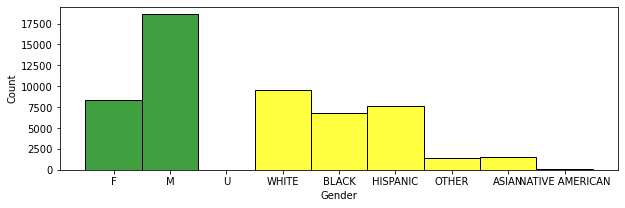

In [17]:
# gender and race count for accident
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(train.Gender, color = 'green')
sns.histplot(train.Race, color = 'yellow')

<AxesSubplot:ylabel='Race'>

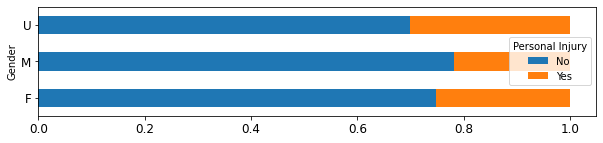

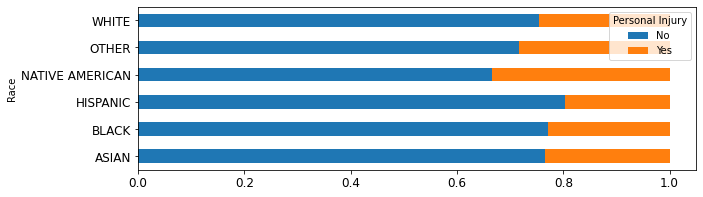

In [18]:
race = pd.crosstab(train.Race, train['Personal Injury'], normalize = 'index')
gender = pd.crosstab(train.Gender, train['Personal Injury'], normalize = 'index')

gender.plot.barh(stacked = True, figsize = (10, 2), fontsize = 12)
race.plot.barh(stacked = True, figsize = (10, 3), fontsize = 12)

### Answer:
* Gender: male accident number is more than double of the female, but the female's personal injury rate is higher than males.


* Race: according to the race count and personal injury rate in the accident, white people should be the highest one.

### 3. What about the relationship between personal injury and Violation Type? alcohol?

<AxesSubplot:ylabel='Alcohol'>

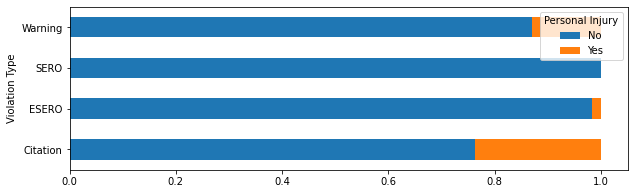

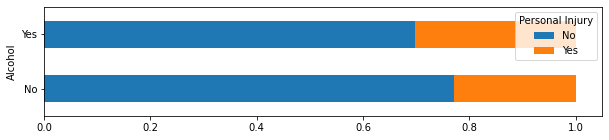

In [19]:
violation = pd.crosstab(train['Violation Type'], train['Personal Injury'], normalize = 'index')
alcohol = pd.crosstab(train.Alcohol, train['Personal Injury'], normalize = 'index')

violation.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)
alcohol.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

### Answer:
* Violation Type: Citation and warning are the highest two, it might be because citation has the highest accident counts.


* Alcohol: alcohol-related accident has more chance to cause personal injury.

### 4. Does personal injury in the accident have a relationship with the agency location?

<AxesSubplot:ylabel='SubAgency'>

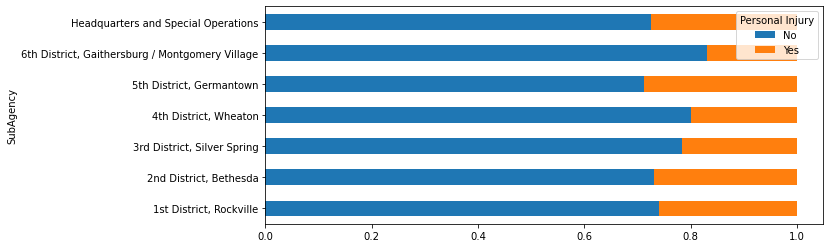

In [20]:
agency = pd.crosstab(train['SubAgency'], train['Personal Injury'], normalize = 'index')
agency.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

In [21]:
observed3 = pd.crosstab(train.SubAgency, train['Personal Injury'])
chi23, p3, degf3, expected3 = stats.chi2_contingency(observed1)

alpha = 0.05
if p3 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### Answer:
* Different locations have different rates of personal injury, they are dependent. Germantown is the highest one.

### 5. Is property damage and belts use have a relationship with personal injury?

<AxesSubplot:xlabel='Property Damage', ylabel='Count'>

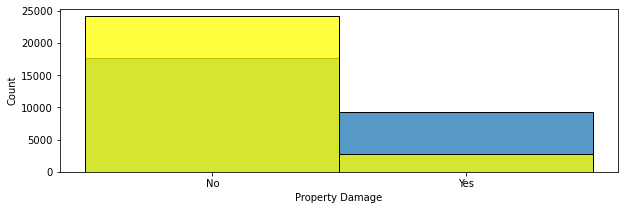

In [42]:
sns.histplot(train['Property Damage'].sort_index(ascending=True))
sns.histplot(train.Belts.sort_index(ascending=True), color = 'yellow')

<AxesSubplot:ylabel='Belts'>

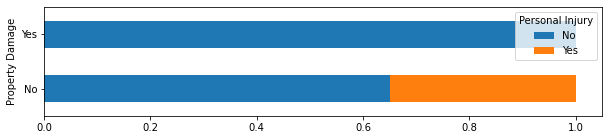

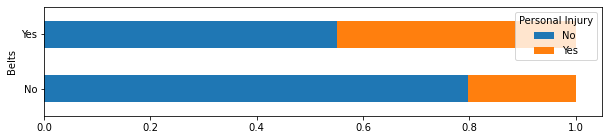

In [45]:
damage = pd.crosstab(train['Property Damage'], train['Personal Injury'], normalize = 'index')
belts = pd.crosstab(train.Belts, train['Personal Injury'], normalize = 'index')
damage.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)
belts.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

### Answer:
* it seems property damage and personal injury has no relationship.
* belts nummber seems hard to explain, maybe because some of the violatons don't require the belt check.

## Summary

Race, gender, alcohol, agency location and all the time features all have relationships with personal injury in traffic accidents. Also, violation type is related to our target variable personal injury. Since violation type is an outcome of traffic violations, personal injury is also an outcome. I prefer to not use one outcome to predict another outcome.

* The feature will be used for feature engineering will be:

    Alcohol, race, gender, subagency, hour, day of the week, month

## Feature Engineering

In [24]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# split the train first
x_train_feature = train[['Alcohol', 'Race','day_of_week', 'hour','Gender','SubAgency','month']]
y_train_feature = train[['Personal Injury']]

# get dummy variables 
x_train_dummy_feature = pd.get_dummies(x_train_feature)
y_train_dummy_feature = pd.get_dummies(y_train_feature, drop_first=True)

In [25]:
# use select k best method to select top 10 attributes
kbest = SelectKBest(f_regression, k=10)
kbest.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[kbest.get_support()]

Index(['Race_HISPANIC', 'day_of_week_Sunday', 'hour_01', 'hour_03', 'hour_14',
       'hour_23', 'SubAgency_2nd District, Bethesda',
       'SubAgency_4th District, Wheaton', 'SubAgency_5th District, Germantown',
       'SubAgency_6th District, Gaithersburg / Montgomery Village'],
      dtype='object')

* select K best : race, day of week, hour, subagency

In [26]:
# use RFE method to select top 10 attributes
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[rfe.get_support()]

Index(['month_01-Jan', 'month_02-Feb', 'month_03-Mar', 'month_04-Apr',
       'month_05-May', 'month_07-Jul', 'month_08-Aug', 'month_09-Sep',
       'month_11-Nov', 'month_12-Dec'],
      dtype='object')

* RFE : month

## Modeling

* Because personal injury in accidents is a boolean/yes or no value, I will use classification machine learning algorithms to build my models.
* Here I will use race, agency location, hour, week of day and month as my features. Then build four different models with the same features.
    1. KNN
    2. Decision tree
    3. Random forest
    4. Logistic regression

For the metric, I will use F1 score because I want to minimize all the false predictions. If there is personal injury in accidents but we don't send out medical assistance, it might cause the casualty couldn't get treatment in time. Or if there is no personal injury but we send medical assistance, it will cause a waste of resources.
* For calculating F1 score, I created a function in prepare.py

In [28]:
# import libraries for modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Baseline

In [29]:
# find the mode of personal injury for baseline
train['Personal Injury'].value_counts()

No     20757
Yes     6165
Name: Personal Injury, dtype: int64

In [30]:
# set baseline on train and validate, also calculate the accuracy
train['baseline'] = 'No'
baseline_accuracy_train = (train['Personal Injury'] == train.baseline).mean()
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')
validate['baseline'] = 'No'
baseline_accuracy_validate = (validate['Personal Injury'] == validate.baseline).mean()
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')

baseline accuracy on train set: 77.10%
baseline accuracy on validate set: 77.53%


In [31]:
# slpit train, validate and test data before modeling
x_train = train[['Race','day_of_week', 'hour','month','SubAgency']]
y_train = train[['Personal Injury']]
x_validate = validate[['Race','day_of_week', 'hour','month','SubAgency']]
y_validate = validate[['Personal Injury']]
x_test = test[['Race','day_of_week', 'hour','month','SubAgency']]
y_test = test[['Personal Injury']]

# get dummy variables
x_train = pd.get_dummies(x_train, drop_first=True)
y_train = pd.get_dummies(y_train, drop_first=True)
x_validate = pd.get_dummies(x_validate, drop_first=True)
y_validate = pd.get_dummies(y_validate, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

## Train
1. KNN
2. Decision tree
3. Random forest
4. Logistic regression

In [33]:
# make the models
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')
tree = DecisionTreeClassifier(max_depth = 14, random_state=123)
rf = RandomForestClassifier(max_depth=19, min_samples_leaf=1,random_state=123)
logit = LogisticRegression(C=1, random_state=123)

# fit the models on the x_train
knn.fit(x_train, y_train)
tree.fit(x_train, y_train)
rf.fit(x_train, y_train)
logit.fit(x_train, y_train)

# get predictions
predictions = knn.predict(x_train)
predictions1 = tree.predict(x_train)
predictions2 = rf.predict(x_train)
predictions6 = logit.predict(x_train)

# get accuracy for each model
print('Accuracy of KNN(k=12) classifier on training set: {:.2%}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of decision tree (max_depth=14) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))
print('Accuracy of random forest (max_depth=19) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))
print(f'baseline accuracy on validate set: {baseline_accuracy_train:.2%}')

Accuracy of KNN(k=12) classifier on training set: 81.61%
Accuracy of decision tree (max_depth=14) classifier on train set: 80.82%
Accuracy of random forest (max_depth=19) classifier on train set: 83.34%
Accuracy of Logistic Regression (c=1) on train set: 77.09%
baseline accuracy on validate set: 77.10%


####  Takeaway: 
* it seems logistic regression model doesn't perform well on imbalance data, there is no need to calculate the F1 score.

In [38]:
# calculate F1 scores on train
f1_knn_train = prepare.f1_score(y_train, predictions)
f1_tree_train = prepare.f1_score(y_train, predictions1)
f1_rf_train = prepare.f1_score(y_train, predictions2)

print('F1 score of KNN(k=12) classifier on training set: {:.2%}'
     .format(f1_knn_train))
print('F1 score of decision tree (max_depth=14) classifier on training set: {:.2%}'
     .format(f1_tree_train))
print('F1 score of random forest (max_depth=19) classifier on training set: {:.2%}'
     .format(f1_rf_train))

F1 score of KNN(k=12) classifier on training set: 41.82%
F1 score of decision tree (max_depth=14) classifier on training set: 31.42%
F1 score of random forest (max_depth=19) classifier on training set: 43.46%


* Accuracy on train: 
    * baseline -- 77.10%
    1. KNN -- 81.61%
    2. Decision tree -- 80.82%
    3. Random forest -- 83.34%
    4. Logistic regression -- 77.09%
    

* F1 score on train:
    1. KNN -- 41.82%
    2. Decision tree -- 31.42%
    3. Random forest -- 43.46%

## Validate
Fit the top three models on validate.

    1. KNN
    2. Decision tree
    3. Random forest

In [35]:
# predict on validate
y_pred_knn_validate = knn.predict(x_validate)
y_pred_tree_validate = tree.predict(x_validate)
y_pred_rf_validate = rf.predict(x_validate)

# evaluate the accuracy on validate
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')
print('Accuracy of KNN (k = 12) classifier on validate set: {:.2%}'
     .format(knn.score(x_validate, y_validate)))
print('Accuracy of decision tree (max_depth = 14) classifier on validate set: {:.2%}'
     .format(tree.score(x_validate, y_validate)))
print('Accuracy of random forest (max_depth=19) classifier on validate set: {:.2%}'
     .format(rf.score(x_validate, y_validate)))

baseline accuracy on validate set: 77.53%
Accuracy of KNN (k = 12) classifier on validate set: 79.25%
Accuracy of decision tree (max_depth = 14) classifier on validate set: 79.16%
Accuracy of random forest (max_depth=19) classifier on validate set: 81.13%


In [39]:
# calculate F1 scores for the top 3 models on validate
predictions3 = knn.predict(x_validate)
predictions4 = tree.predict(x_validate)
predictions5 = rf.predict(x_validate)

f1_knn_validate = prepare.f1_score(y_validate, predictions3)
f1_tree_validate = prepare.f1_score(y_validate, predictions4)
f1_rf_validate = prepare.f1_score(y_validate, predictions5)

print('F1 score of KNN(k=12) classifier on validate set: {:.2%}'
     .format(f1_knn_validate))
print('F1 score of decision tree (max_depth=14) classifier on validate set: {:.2%}'
     .format(f1_tree_validate))
print('F1 score of random forest (max_depth=19) classifier on validate set: {:.2%}'
     .format(f1_rf_validate))

F1 score of KNN(k=12) classifier on validate set: 30.73%
F1 score of decision tree (max_depth=14) classifier on validate set: 24.06%
F1 score of random forest (max_depth=19) classifier on validate set: 31.17%


* Accuracy on validate:     
    * baseline -- 77.53%
    1. KNN -- 79.25%
    2. Decision tree -- 79.08%
    3. Random forest -- 81.13%


* F1 score on validate:
    1. KNN -- 30.73%
    2. Decision tree -- 24.06%
    3. Random forest -- 31.17%
    
### Random forest is the best model

## Test - Random Forest ( max_depth = 19)

In [40]:
# predict on test
y_pred_test = rf.predict(x_test)

# evaluate on test
print('Accuracy of decision tree (max_depth = 19) on test set: {:.2%}'
     .format(rf.score(x_test, y_test)))

Accuracy of decision tree (max_depth = 19) on test set: 81.07%


In [46]:
predictions7 = rf.predict(x_test)
prepare.f1_score(y_test, predictions7)

0.3111279333838002

### Expectation:
According to the test result, I expect the model will perform 81.07% accuracy in the future data if the data souce has no major change.

# Conclusion

## Summary
By analyzing the attributes of personal injury in Montgomery county (MD) traffic accidents. We built a Random forest model with a max depth of 19 to predict personal injury in accidents. The features I used for this model are race, agency location, hour, day of week and month. 
The accuracy of the test model is 81.07%.

## Recommendations 

1. In the original data, the traffic violation description part has too many different variables (around 16000+). It's very hard to organize the description. But I think this is a very important feature for predicting accidents and personal injury. Creating more categories for separating violations will be very helpful.


2. Montgomery county's traffic violation data doesn't have the age information. A lot more other places' records do have the age columns. I guess it's an important attribute and wish they can add age to the data.


3. For the accident location, it will be better to have a city column instead of having detailed address. In this report, I use the race column to kind of estimating the location since some places do have more volume of a certain race. But I don't think this method is accurate.

## Next Steps

1. I would like to organize the description into different categories to see if will help my model perform better.


2. Personal injury in the accident is not the only outcome of traffic violations. I would like to analyze more outcomes. Explore more different target variables from this data.

### Github:

https://github.com/Chenchen070/Individual_project_traffic_violation.git